# Методы семплирования для расшифровки сообщений

### Введение

Этот ноутбук посвящен применению методов семплирования ??? для повторения и улучшения метода
расшифровки сообщений, который применял знаменитый персонаж Артура Конана Дойля Шерлок Холмс в рассказе "Пляшущие человечки".  Как известно, в рассказе великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:

![Dancing_men_2](img/Dancing_men_2.gif)

Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее. После частнотности сыщик применял уже более развернутый анализ, навроде "какое слово из 5 букв начинается и заканчивается на одну и ту же букву". В этом ноутбуке будет предложен более современный и продвинутый вариант такого частотного метода.

### 1. Базовый частотный метод по Шерлоку Холмсу

Но для начала импорты

In [29]:
import re
import numpy as np
import random
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from itertools import islice

Вычитаем русские тексты в память и почистим

In [2]:
with open('./corpora/AnnaKarenina.txt', 'r') as fin:
    anna_karenina = fin.read()
    
with open('./corpora/WarAndPeace.txt', 'r') as fin:
    war_and_peace = fin.read()

Регулярка такова, чтобы дропать всякие французские символы из корпуса

In [3]:
word_regex = re.compile('[А-я]+')

In [4]:
anna_karenina_cleaned = ' '.join(word.lower() for word in word_regex.findall(anna_karenina))
war_and_peace_cleaned = ' '.join(word.lower() for word in word_regex.findall(war_and_peace))

In [5]:
war_and_peace_cleaned[:1000]

'война и мир самый известный роман льва николаевича толстого как никакое другое произведение писателя отражает глубину его мироощущения и философии эта книга из разряда вечных потому что она обо всем о жизни и смерти о любви и чести о мужестве и героизме о славе и подвиге о войне и мире первый том знакомит с высшим обществом россии века показаны взаимоотношения между родителями и детьми в семье ростовых сватовство у болконских интриги у безуховых вечера в салоне фрейлины а п шерер балы в москве и петербурге лев николаевич толстойчасть первая часть орая часть третья лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте

Подготовим почву для шифровки текстов. Случайные перестановки - скучновато, никакой связи с пляшущими человечками. Самое близкое по духу,
что есть для такой задачки в `Unicode` - эмодзи:)

In [6]:
emoji_alphabet = '👨👮💂👰👸🤴🦸🦹🎅🧙🧝🧛🧟🧞🧜🧚👼🤰🤱🙇💁🙅🙋👭🤦🤷🧖💃🕺👯🕴🚶🧕'
ru_alphabet = ''.join(sorted(list(set(anna_karenina_cleaned))))

In [7]:
def generate_cipher(orig_alphabet, cipher_alphabet):
    cipher_alphabet_shuffled = cipher_alphabet.copy()
    random.shuffle(cipher_alphabet_shuffled)
    conformity = {
        orig_char: cipher_char
        for orig_char, cipher_char in zip(orig_alphabet, cipher_alphabet_shuffled)}
    sol = {cipher_char: orig_char for orig_char, cipher_char in conformity.items()}
    return conformity, sol

In [8]:
def encode_text(text, cipher):
    return ''.join(cipher[ch] for ch in text)

In [9]:
def decode_text(text, solution):
    return ''.join(solution[ch] for ch in text)

In [10]:
def accuracy_score(decoded_text, orig_text):
    return (np.array(list(decoded_text)) == np.array(list(orig_text))).sum() / len(decoded_text)

Зафиксируем шифр

In [11]:
emoji_cipher, solution = generate_cipher(list(ru_alphabet), list(emoji_alphabet))

Например (несколько sanity check-ов)

In [12]:
text = 'а как же серсо'
encoded_text = encode_text(text, emoji_cipher)
decoded_text = decode_text(encoded_text, solution)
print(f'Исходный текст: {repr(text)},\nЗашифрованный {repr(encoded_text)}')

Исходный текст: 'а как же серсо',
Зашифрованный '🚶🧛🧞🚶🧞🧛🙋👮🧛🤦👮🎅🤦🦸'


In [13]:
print(f'Исходный зашифрованный текст: {repr(encoded_text)},\nРасшифрованный {repr((decoded_text))}')

Исходный зашифрованный текст: '🚶🧛🧞🚶🧞🧛🙋👮🧛🤦👮🎅🤦🦸',
Расшифрованный 'а как же серсо'


In [14]:
print(accuracy_score(text, decoded_text))

1.0


Теперь закодируем тексты

In [15]:
encoded_karenina = encode_text(anna_karenina_cleaned, emoji_cipher)
encoded_war_and_peace = encode_text(war_and_peace_cleaned, emoji_cipher)
print(encoded_karenina[:500])

🚶💃💃🚶🧛🧞🚶🎅👮💃💂💃🚶🧛🦸🧚💂💃🧛💂🧙🧛🤦🚶🕴🕺🧖🧛🧙💃🚶🕴👮💃💂🦹🕺🧖🧛🎅🦸🕴🚶💃🦸👨🧛👼🙅👨🚶🧛🦹🦸👼🤦🦹🦸👭🦸🧛💃🚶👸💂💃🚶👮🦹🤦💁🧛🤦🦹🚶👨🧝👮🤴🧛🚶🤱🦸🎅💂🧙🕴🦸🕴🧛🤱🎅🚶🧙🦸🤴🧛👨🤦👮🧛🤦👸🚶🤦🦹👼💂👨🕺👮🧛🤦👮🕴🙅💂🧛🤰🦸🧖🦸🙋💂🧛🧚🎅🙇👭🧛💃🚶🧛🧚🎅🙇👭🚶🧛🧞🚶🙋🧚🚶💁🧛💃👮🤦👸🚶🤦🦹👼💂👨🚶💁🧛🤦👮🕴🙅💁🧛💃👮🤦👸🚶🤦🦹👼💂👨🚶🧛🤰🦸🧛🤦👨🦸👮🕴🙇🧛🤷🦹🦸🧛🧞💃💂👭🚶🧛🦸🧛👨👮👸💃🕺🧖🧛👯👮💃💃🦸🤦🦹💁🧖🧛🦸🧛👼🧕🧟👨💂🧛🦸🧛👨👮🎅👮🧛🦸🧛🤦👮🕴🙅👮🧛🦸🧛👸👮👼🦸👨👮👸👮🤦🧞🦸🕴🧛🧚🦸🤦🦹🦸💂💃🤦🦹👨👮🧛👼👮👨🧛🦹🦸👼🤦🦹🦸🤴🎅🦸🕴🚶💃🧛🧝💂🎅🦸🧞🦸👭🦸🧛🧚🕺🧖🚶💃💂💁🧛👸🚶🤦🦹🙅🧛🤰👮🎅👨🚶💁🧛👼👮👨🧛🦹🦸👼🤦🦹🦸🤴🧛🚶💃💃🚶🧛🧞🚶🎅👮💃💂💃🚶🧛🎅🦸🕴🚶💃🧛🧝💂🎅🦸🧞🦸👭🦸🧛🧚🕺🧖🚶💃💂💁🧛🚶💃💃🚶🧛🧞🚶🎅👮💃💂💃🚶🧛🤰🦸🎅🚶🧙💂👼🚶🧛🤦🦸👨🎅👮🕴👮💃💃💂🧞🦸👨🧛👨🤦👮🧚💃👮👨💃🦸🤦🦹🙅🧕🧛🤦🦸🧚👮🎅🙋🚶💃💂💁🧛💃👮🦸🧟🕺👸🚶🤴💃🚶💁🧛🤦👨🦸🧟🦸🧚🚶🧛🎅🚶🤦🧞🦸👨🚶💃💃🦸🤦🦹🙅🧛🤰🦸👨👮🤦🦹👨🦸👨🚶💃💂💁🧛🙇🧚💂👨💂🦹👮👼🙅💃🦸🧛🤦🦸👸👮🦹🚶👼💂🤦🙅🧛👨🧛🤷🦹🦸


#### Базовый частотный метод

На этапе обучения - просто запоминаем частоты букв в тренировочном корпусе.
На этапе расшифровки - считаем частоты на тестовом тексте и составляем соответствие - _самая частая буква в тестовой строке == самая частая буква в обучающем корпусе_ и так далее

In [16]:
class FreqCipherDecoder():
    def __init__(self):
        pass
        
    def fit(self, corpora: str):
        char_cnt = dict(Counter(corpora).most_common())
        len_corpora = len(corpora)
        self.char_freq = {
            ch: (cnt / len_corpora) for ch, cnt in char_cnt.items()
        }
        
    def decode(self, encoded_text):
        encoded_cnt = dict(Counter(encoded_text).most_common())
        len_text = len(encoded_text)
        encoded_freq = {
            ch: (cnt / len_text) for ch, cnt in encoded_cnt.items()
        }
        self.solution = {
            enc_ch: dec_ch for enc_ch, dec_ch in zip(encoded_freq.keys(), self.char_freq.keys())
        }
        
        decoded_text = decode_text(encoded_text, self.solution)
        return decoded_text

Выучим частоты из Анны Карениной и дешифруем саму же Анну Каренину - очевидно получим 100% точность, поскольку все частоты будут на своих местах

In [17]:
decoder = FreqCipherDecoder()
decoder.fit(anna_karenina_cleaned)
decoded_karenina = decoder.decode(encoded_karenina)
print(f'Точность расшифровки если учиться на Анне Карениной и ее же расшифровывать:\n\
Accuracy = {accuracy_score(anna_karenina_cleaned, decoded_karenina)}')

Точность расшифровки если учиться на Анне Карениной и ее же расшифровывать:
Accuracy = 1.0


А вот расшифровывать случайные конечные куски будет уже далеко не так эффективно, поскольку не успевают набежать частоты букв, которые пронаблюдали для всего текста

In [18]:
decoded_karenina_part = decoder.decode(encoded_karenina[:5000])
print(f'Точность расшифровки если учиться на Анне Карениной, а расшифровывать ее небольшой кусок (размером 5000 символов):\n\
Accuracy = {accuracy_score(anna_karenina_cleaned[:5000], decoded_karenina_part)}')
print('\n--Наглядное качество расшифровки небольшого куска текста--\n')
print(decoded_karenina_part[:500])
print('-'*50)

Точность расшифровки если учиться на Анне Карениной, а расшифровывать ее небольшой кусок (размером 5000 символов):
Accuracy = 0.2654

--Наглядное качество расшифровки небольшого куска текста--

иееи диваенеи омне ны тикуж ыеикаенсуж вокиеол рчли сортсозо еийнеиастг тсилюая ифовныкок фвиыоя лта тйитсрнлуа такчн ьожошн мвпз еи мвпзи дишмиг еатйитсрнлиг такчг еатйитсрнли ьо тлоакп хсо дензи о лайеуж щаееотсгж о рэблн о лава о такча о йаролайатдок мотсонетсла рал сортсоявокие юнводозо мужиенг йитсч ьавлиг рал сортсоя иееи диваенеи вокие юнводозо мужиенг иееи диваенеи ьовиынри толвакаеендол лтамеалеотсчэ томавшиенг еаобуйияеиг тлобоми витдолиееотсч ьолатслолиенг пмнлнсарчео тойасирнтч л хсо
--------------------------------------------------


Как видно - ничего не понятно. Стоит отметить, что это в принципе повторяет сюжет рассказа - с появлением каждого нового текста из человечков главный герой все лучше и лучше разгадывал шифр. Построим график зависимости точности расшифровки от длины тестовой строки

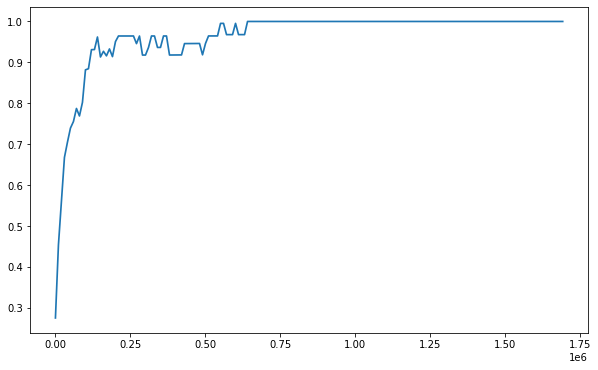

In [22]:
# Графические штуки
lens, accuracies = [], []
for test_len in tqdm(range(1000, len(anna_karenina_cleaned), 10000)):
    lens.append(test_len)
    accuracies.append(accuracy_score(decoder.decode(anna_karenina_cleaned[:test_len]), anna_karenina_cleaned[:test_len]))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(lens, accuracies, label="Точность расшифровки", linewidth=1.7)

Как и ожидалось, начиная с какого-то достаточно гигансткого куска текста (примерно в половину произведения :)) точность увеличивается до 100% - 
успевают набраться частоты буквы, позволяющие им расположиться в отсортированном виде в том же порядке, как и во всем произведении

Естественно, учить частоты на одном тексте, а дешифровать другой текст, такие зависимости пронаблюдать не позволяет. Посмотрим на примере романа "Война и Мир"

In [24]:
decoded_war_and_peace = decoder.decode(encoded_war_and_peace)
print(f'Точность расшифровки если учиться на Анне Карениной, а расшифровывать всю Войну и Мир:\n\
Accuracy = {accuracy_score(war_and_peace_cleaned, decoded_war_and_peace)}')
print('\n--Наглядное качество расшифровки--\n')
print(decoded_war_and_peace[:700])
print('-'*50)

Точность расшифровки если учиться на Анне Карениной, а расшифровывать всю Войну и Мир:
Accuracy = 0.6363893631379427

--Наглядное качество расшифровки--

вожие н мнр семгж нбвастигж ромеи лыве инколеавнзе толстоьо кек инкекоа друьоа пронбвадаина пнсеталя отрейеат ьлучниу аьо мнрооцуцаиня н фнлософнн щте кинье нб ребряде вазигх потому зто оие очо всам о йнбин н смартн о лючвн н застн о муйаства н ьаронбма о слева н подвньа о вожиа н мнра парвгж том биекомнт с вгсшнм очцаством росснн ваке покебеиг вбенмоотиошаиня майду роднталямн н датымн в самыа ростовгх световство у чолкоискнх нитрньн у чабуховгх вазаре в селоиа фражлниг е п шарар челг в москва н патарчурьа лав инколеавнз толстожзесты парвея зесты орея зесты тратыя лав инколеавнз толстож вожие н мнр том зесты парвея а помастыя мож варигж реч иу зто киябы ьаиуе н лукке стелн иа чолыша кек пома
--------------------------------------------------


Видно, что закономерности встречаемости русских букв вообще в любых русских текстах частично позволяют с какой-то не совсем печальной
точностью декодить тексты, но выглядит так себе

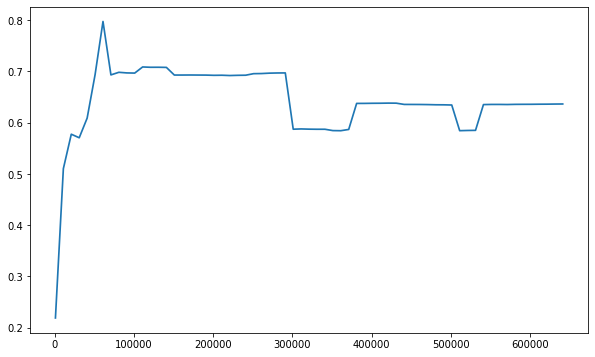

In [26]:
# Графические штуки #2
lens, accuracies = [], []
for test_len in tqdm(range(1000, len(war_and_peace_cleaned), 10000)):
    lens.append(test_len)
    accuracies.append(accuracy_score(decoder.decode(war_and_peace_cleaned[:test_len]), war_and_peace_cleaned[:test_len]))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(lens, accuracies, label="Точность расшифровки", linewidth=1.7)

### 2. Базовый частотный метод по Шерлоку Холмсу, но на биграммах

На этапе обучения считаем и запоминаем частоты биграмм в исходном тексте

In [27]:
class BigramFreqCipherDecoder():
    def __init__(self):
        pass
        
    def fit(self, corpora: str):
        char_cnt = dict(Counter(corpora).most_common())
        len_corpora = len(corpora)
        self.char_freq = {
            ch: (cnt / len_corpora) for ch, cnt in char_cnt.items()
        }
        
    def decode(self, encoded_text):
        encoded_cnt = dict(Counter(encoded_text).most_common())
        len_text = len(encoded_text)
        encoded_freq = {
            ch: (cnt / len_text) for ch, cnt in encoded_cnt.items()
        }
        self.solution = {
            enc_ch: dec_ch for enc_ch, dec_ch in zip(encoded_freq.keys(), self.char_freq.keys())
        }
        
        decoded_text = decode_text(encoded_text, self.solution)
        return decoded_text

In [37]:
len(list(islice(anna_karenina_cleaned, 1, None)))

1694972

In [35]:
len(anna_karenina_cleaned)

1694973

In [39]:
len(list(zip(anna_karenina_cleaned, islice(anna_karenina_cleaned, 1, None))))

1694972

In [31]:
Counter(zip(anna_karenina_cleaned, islice(anna_karenina_cleaned, 1, None)))

[(('о', ' '), 40512),
 (('е', ' '), 31907),
 (('а', ' '), 31641),
 (('и', ' '), 30643),
 ((' ', 'н'), 27750),
 ((' ', 'с'), 27319),
 ((' ', 'в'), 25044),
 (('т', 'о'), 24155),
 ((' ', 'п'), 23799),
 ((' ', 'о'), 22814),
 (('я', ' '), 18823),
 ((' ', 'и'), 18730),
 (('н', 'а'), 18420),
 (('с', 'т'), 17653),
 (('ь', ' '), 17631),
 (('н', 'е'), 16580),
 (('н', 'о'), 16321),
 (('а', 'л'), 16127),
 ((' ', 'к'), 15317),
 ((' ', 'т'), 14061),
 (('г', 'о'), 14058),
 (('о', 'н'), 13884),
 (('п', 'о'), 13699),
 (('к', 'о'), 13139),
 (('н', 'и'), 12996),
 (('к', 'а'), 12953),
 (('л', 'а'), 12768),
 ((' ', 'д'), 12348),
 (('о', 'в'), 12277),
 (('е', 'н'), 12233),
 (('й', ' '), 12210),
 (('л', ' '), 12145),
 (('м', ' '), 11864),
 (('в', 'о'), 11765),
 (('р', 'о'), 11580),
 (('р', 'а'), 11537),
 ((' ', 'б'), 11300),
 (('у', ' '), 11191),
 ((' ', 'ч'), 10583),
 (('о', 'т'), 10561),
 (('т', 'ь'), 10409),
 (('п', 'р'), 10400),
 (('о', 'с'), 9824),
 (('л', 'о'), 9708),
 (('е', 'л'), 9644),
 ((' ', 'м'),